## Notebook 4 : Trends and forecasts of property values 

## 1 - Introduction ##

Overview of the notebook’s objective and the data used.


this notebook will help identifying the past trends and foresee the evolution of the property values. We will base this analysis on historical data. Retrospective analysis : How did the prices evolve throughout time ? Can we target global  and seasonal trends ? What would be the prices in 3, 5 or 10 years ? Those insights can be more robust by linking them to geographical comparisons.

In [1]:
#### EXPLORING THE DATASET ####
import pandas as pd

# Read in the data
df_tf = pd.read_csv('df_complete.csv')

df_tf.head()

/var/folders/sr/6t4rh27j1v1fr55gfr9fvsv40000gn/T/ipykernel_24817/3054222096.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tf = pd.read_csv('df_complete.csv')


,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee
0,2019-01-07 00:00:00.000000000,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019
1,2019-04-07 00:00:00.000000000,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019
2,2019-04-07 00:00:00.000000000,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019
3,2019-04-07 00:00:00.000000000,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019
4,2019-03-07 00:00:00.000000000,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,0.0,0,0.0,0.0,8.0,2019


In [3]:
df_clean = df_tf[
    (df_tf['Valeur fonciere'] > 0) & 
    (df_tf['Surface reelle bati'] > 0) &
    ((df_tf['Nombre pieces principales'] > 0) | (df_tf['Type local'] == 'Terrain')|df_tf['Type local']!=0)
]

#df_clean.describe()
#df_clean.head(20)


In [12]:
#### CONVERTS TO THE RIGHT TYPE ####


category_convert = ['Nature mutation', 'Voie', 'Code postal', 'Commune', 'Code departement', 'Code commune', 'Code type local', 'Type local']
df_clean[category_convert] = df_clean[category_convert].astype('category')

df_clean['Date mutation'] = pd.to_datetime(df_clean['Date mutation'], errors = 'coerce')
df_clean['Date mutation'] = df_clean['Date mutation'].interpolate(method='linear')


df_clean['Valeur fonciere']=df_clean['Valeur fonciere'].replace({'\xa0':'',',':'.'}, regex=True)
df_clean['Valeur fonciere']=pd.to_numeric(df_clean['Valeur fonciere'], errors='coerce')

df_clean.info()

/var/folders/sr/6t4rh27j1v1fr55gfr9fvsv40000gn/T/ipykernel_24817/2001316408.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[category_convert] = df_clean[category_convert].astype('category')
/var/folders/sr/6t4rh27j1v1fr55gfr9fvsv40000gn/T/ipykernel_24817/2001316408.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Date mutation'] = pd.to_datetime(df_clean['Date mutation'], errors = 'coerce')
/var/folders/sr/6t4rh27j1v1fr55gfr9fvsv40000gn/T/ipykernel_24817/2001316408.py:8: SettingWit

<class 'pandas.core.frame.DataFrame'>
Index: 6749462 entries, 0 to 17810873
Data columns (total 16 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Date mutation              datetime64[ns]
 1   Nature mutation            category      
 2   Valeur fonciere            float64       
 3   Voie                       category      
 4   Code postal                category      
 5   Commune                    category      
 6   Code departement           category      
 7   Code commune               category      
 8   Nombre de lots             int64         
 9   Code type local            category      
 10  Type local                 category      
 11  Surface reelle bati        float64       
 12  Nombre pieces principales  float64       
 13  Surface terrain            float64       
 14  annee                      int64         
 15  Mois                       int32         
dtypes: category(8), datetime64[ns](1), float

In [4]:
#### CHECK MISSING VALUES ####
df_clean.isnull().sum()
# Comptage des zéros dans chaque colonne
(df_clean == 0).sum()


Date mutation                      0
Nature mutation                    0
Valeur fonciere                    0
Voie                               0
Code postal                      321
Commune                            0
Code departement                   0
Code commune                       0
Nombre de lots               4134025
Code type local                    0
Type local                         0
Surface reelle bati                0
Nombre pieces principales     569088
Surface terrain              2648743
annee                              0
dtype: int64

In [5]:
#### CHECK DUPLICATES ####
#df_tf.drop_duplicates(keep='last', inplace=True)
df_clean.duplicated().sum()

0

In [6]:
df_clean.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee
0,2019-01-07,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019
1,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019
2,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019
3,2019-04-07,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019
5,2019-03-07,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,1.0,Maison,110.0,5.0,2483.0,2019


## 2 - Methodology ##

Explanation of the analysis methods and visualizations.

Data Exploration:
- Analyze the evolution of property values over time (by year).
- Identify significant periods of increase or decrease in prices.

In [14]:
#### LIBRARIES ####
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

Nous avons ci-dessous un graphique qui trace l'evolution de la médiane et la moyenne des valeurs foncières de 2019 à 2024. 

/var/folders/sr/6t4rh27j1v1fr55gfr9fvsv40000gn/T/ipykernel_23687/2970143051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Date mutation'] = pd.to_datetime(df_clean['Date mutation'])
/var/folders/sr/6t4rh27j1v1fr55gfr9fvsv40000gn/T/ipykernel_23687/2970143051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Mois'] = df_clean['Date mutation'].dt.month


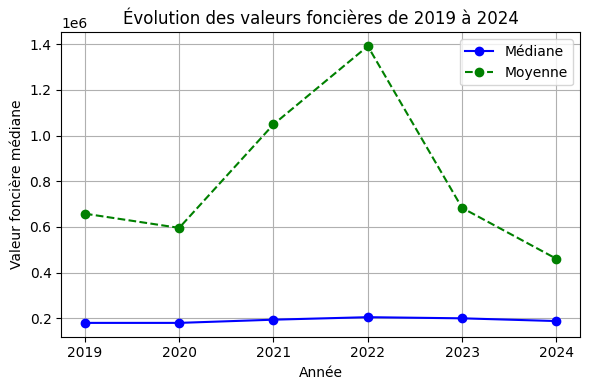

In [8]:
median_peryear=df_clean.groupby('annee')['Valeur fonciere'].median().reset_index()
mean_peryear=df_clean.groupby('annee')['Valeur fonciere'].mean().reset_index()

def plot_evolution_valeurs():
    plt.figure(figsize=(6, 4))
    plt.plot(median_peryear['annee'], median_peryear['Valeur fonciere'], marker='o', label='Médiane', color='blue')

    plt.plot(mean_peryear['annee'], mean_peryear['Valeur fonciere'], marker='o', label='Moyenne', color='green', linestyle='--')

    plt.title('Évolution des valeurs foncières de 2019 à 2024')
    plt.xlabel('Année')
    plt.ylabel('Valeur foncière médiane')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_evolution_valeurs()

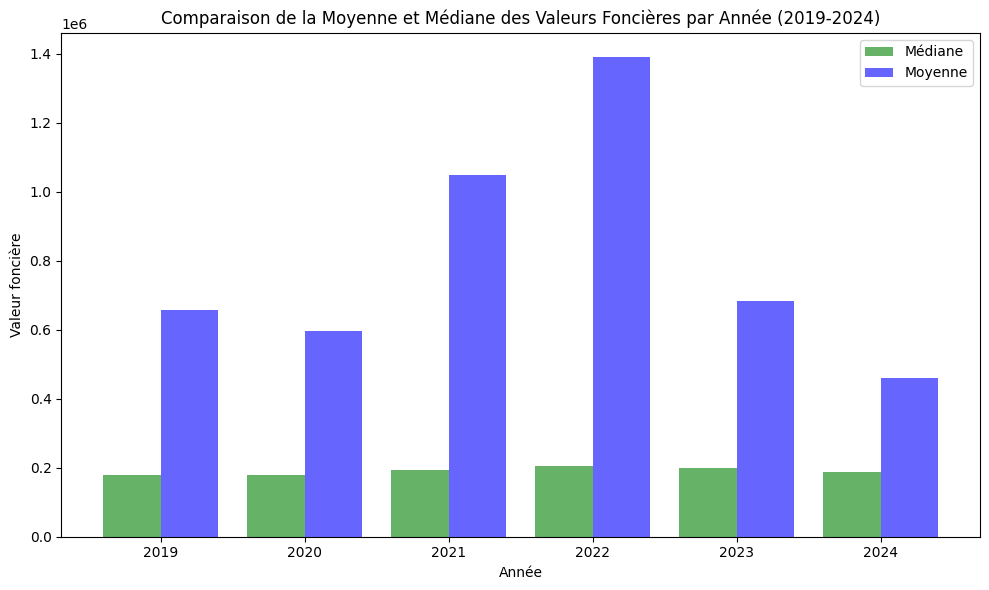

In [9]:
def plot_evolution_barchart(mean_peryear, median_peryear):
    plt.figure(figsize=(10, 6))

    x = mean_peryear['annee']
    offset = 0.2 
    plt.bar(x - offset, median_peryear['Valeur fonciere'], width=offset * 2, label='Médiane', color='green', alpha=0.6)
    plt.bar(x + offset, mean_peryear['Valeur fonciere'], width=offset * 2, label='Moyenne', color='blue', alpha=0.6)
    plt.title('Comparaison de la Moyenne et Médiane des Valeurs Foncières par Année (2019-2024)')
    plt.xlabel('Année')
    plt.ylabel('Valeur foncière')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_evolution_barchart(mean_peryear, median_peryear)



In [15]:
def interactive_plot(year=2019):
    filtered_year = df_clean[df_clean['annee'] == year]
    month_trends_median = filtered_year.groupby('Mois')['Valeur fonciere'].median().reset_index()
    month_trends_mean = filtered_year.groupby('Mois')['Valeur fonciere'].mean().reset_index()

    plt.figure(figsize=(6, 4))
    plt.plot(month_trends_median['Mois'].astype(str), month_trends_median['Valeur fonciere'], marker='o', label=f'Médiane {year}', c='red')
    #plt.plot(month_trends_mean['mois'].astype(str), month_trends_mean['Valeur fonciere'], marker='o',label=f'Moyenne {year}', c='blue' )
    plt.title(f'Évolution des valeurs foncières pour {year}')
    plt.xlabel('Mois')
    plt.ylabel('Valeur foncière médiane')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

interact(interactive_plot, year=widgets.IntSlider(value=2019, min=2019, max=2024, step=1))


interactive(children=(IntSlider(value=2019, description='year', max=2024, min=2019), Output()), _dom_classes=(…

<function __main__.interactive_plot(year=2019)>

Rupture point detection changes 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pwlf  # pip install pwlf
import plotly.graph_objects as go  # pip install plotly

# Regroupement par mois (assurez-vous que 'Date mutation' est en format datetime)
month_trends_median = df_clean.groupby('Mois')['Valeur fonciere'].median().reset_index()

#df_monthly = df_clean.resample('M', on='Date mutation').mean()  # Moyenne mensuelle

# Données simplifiées (on prend seulement les valeurs foncières et les dates)
y = month_trends_median['Valeur fonciere'].to_numpy()
dates = month_trends_median.index

# Créer un index pour la régression segmentée
x = np.arange(len(y))  # Index des points (x)

# Modèle de régression segmentée
pwl_model = pwlf.PiecewiseLinFit(x, y)

# Ajuster le modèle avec un nombre de segments donné (par ex. 3)
n_segments = 5
breakpoints = pwl_model.fit(n_segments)

# Tracer la régression par segments
y_pred = pwl_model.predict(x)

# Visualisation interactive avec Plotly
fig = go.Figure()

# Tracer les données originales
fig.add_trace(go.Scatter(x=dates, y=y, mode='lines+markers', name='Valeur foncière', line=dict(color='blue', width=2)))

# Tracer la régression par segments
fig.add_trace(go.Scatter(x=dates, y=y_pred, mode='lines', name=f'Regression par segments ({n_segments} segments)', line=dict(color='red', width=2)))

# Ajouter les points de rupture (breakpoints)
for bp in breakpoints:
    fig.add_vline(x=dates[int(bp)], line=dict(color='green', dash='dash', width=2), annotation_text='Point de rupture', annotation_position="top right")

# Ajouter les titres et labels
fig.update_layout(
    title="Détection des ruptures (régression segmentée)",
    xaxis_title="Date",
    yaxis_title="Valeur foncière",
    template="plotly_dark",
    showlegend=True
)

# Afficher le graphique interactif
fig.show(renderer="browser")



In [26]:
import plotly.graph_objects as go
def interactive_plot_local(type_bien="Maison"):
    # Filtrer les données en fonction du type de bien sélectionné
    filtered_df = df_clean[df_clean['Type local'] == type_bien]
    
    # Calculer la médiane des valeurs foncières par mois
    monthly_prices = filtered_df.groupby(['annee', 'Mois'])['Valeur fonciere'].median().reset_index()
    
    # Créer le graphique interactif
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=pd.to_datetime(monthly_prices[['annee', 'Mois']].assign(day=1).astype(str).agg('-'.join, axis=1)),
        y=monthly_prices['Valeur fonciere'],
        mode='lines+markers',
        name=f"Prix médian - {type_bien}",
        line=dict(color='blue'),
        marker=dict(color='blue')
    ))

    fig.update_layout(
        title=f"Évolution des prix des {type_bien} au fil du temps",
        xaxis_title="Date",
        yaxis_title="Valeur foncière médiane",
        xaxis=dict(
            tickformat="%b %Y",  # Format de date : Mois Année (ex. Jan 2023)
            tickangle=45,
        ),
        showlegend=True
    )
    return fig
    

# Créer un sélecteur interactif pour choisir le type de bien
interact(interactive_plot_local, type_bien=widgets.Dropdown(
    options=df_clean['Type local'].unique(),  # Liste des types de biens dans tes données
    value='Maison',
    description='Type de bien:',
))

fig.show(interactive_plot_local)


interactive(children=(Dropdown(description='Type de bien:', options=('Maison', 'Appartement', 'Local industrie…

NameError: name 'fig' is not defined

## 3 - Results ##

Presentation of the analyses, visualizations, and findings.

Visualizations:
- Time series graphs showing property value trends over the years.
- Line charts comparing trends across different regions.

## 4 - Conlusion and recommandations ##

Summary of discoveries and investment advice.

Conclusions:
- Synthesize observed price trends over the past years.
- Identify external factors that could explain changes (e.g., economy, demographics, infrastructure).

Recommendations:
- Propose investment recommendations based on future price forecasts (e.g., investing in regions with predicted price growth).
- Risk management advice based on past and future property value trends.